#Food Delivery Time Prediction

In [ ]:
!pip install shap

In [ ]:
!pip install scipy==1.11.4
!pip install dalex
!pip install scikit-plot
!pip install lime

In [ ]:
import joblib
print(joblib.__version__)

1.5.1


In [ ]:
import sklearn
print(sklearn.__version__)

1.6.1


In [ ]:
# import pandas for data wrangling
import pandas as pd

pd.__version__

'2.2.2'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None) # show all columns
pd.set_option("display.max_rows", None) # show all rows

In [ ]:
# import scipy for certain statistical function
from scipy import stats

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# import multi-layer perceptron
from sklearn.neural_network import MLPClassifier
# import decision tree model as surrogate model
from sklearn.tree import DecisionTreeClassifier
# import tree module
from sklearn import tree

# import xgboost classifier
from xgboost import XGBClassifier

# import dalex to explain complex model
import dalex as dx

# load scikit-plot modules
import scikitplot as skplt

# load shap package for shap explanation
import shap

# load LimeTabularExplainer for LIME method
from lime.lime_tabular import LimeTabularExplainer

# 1. Business Understanding & Goals

In [ ]:
df_food = pd.read_csv('/content/drive/MyDrive/Final project Take Home Test dibimbing/Data Scientist/Food_Delivery_Times.csv')
df_food.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [ ]:
df_food['Delivery_Time_min'].min()

8

In [ ]:
df_food['Delivery_Time_min'].max()

153

In [ ]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


# 2. Data Cleaning

## A. Handling Duplicated Data

In [ ]:
len(df_food.drop_duplicates()) / len(df_food)
#jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat

1.0

There's no any duplicated Data

## B. Handling Missing Value Data

In [ ]:
df_food.isna().sum()

,0
Order_ID,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


In [ ]:
df_food[df_food.isna().any(axis=1)]

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
6,627,9.52,Clear,Low,NaN,Bike,12,1.0,49
14,939,2.80,Clear,High,Morning,Scooter,10,NaN,33
24,211,11.20,Clear,Medium,Morning,Bike,23,NaN,73
42,313,0.99,NaN,Medium,Evening,Bike,15,NaN,32
71,494,4.17,NaN,Low,Evening,Scooter,5,1.0,22
85,549,10.65,Clear,NaN,Afternoon,Scooter,23,8.0,58
90,383,12.76,Windy,High,Morning,Scooter,27,NaN,74
95,437,1.92,Clear,Low,NaN,Bike,8,7.0,14
110,529,1.60,Foggy,Low,Night,Scooter,24,NaN,37
113,817,12.03,Clear,Medium,NaN,Car,20,5.0,65


In [ ]:
for column in df_food.columns:
    print(f"============= {column} =================")
    display(df_food[column].value_counts())
    print()

============= Order_ID =================


,count
Order_ID,
522,1
587,1
163,1
909,1
153,1
802,1
994,1
756,1
112,1



============= Distance_km =================


,count
Distance_km,
12.85,5
17.61,4
19.41,4
4.14,3
13.60,3
10.73,3
1.38,3
5.53,3
3.23,3



============= Weather =================


,count
Weather,
Clear,470
Rainy,204
Foggy,103
Snowy,97
Windy,96



============= Traffic_Level =================


,count
Traffic_Level,
Medium,390
Low,383
High,197



============= Time_of_Day =================


,count
Time_of_Day,
Morning,308
Evening,293
Afternoon,284
Night,85



============= Vehicle_Type =================


,count
Vehicle_Type,
Bike,503
Scooter,302
Car,195



============= Preparation_Time_min =================


,count
Preparation_Time_min,
14,52
16,49
25,48
10,47
9,46
11,46
17,45
6,44
22,42



============= Courier_Experience_yrs =================


,count
Courier_Experience_yrs,
6.0,109
9.0,108
1.0,107
8.0,101
2.0,99
4.0,94
7.0,91
0.0,91
5.0,90



============= Delivery_Time_min =================


,count
Delivery_Time_min,
71,23
48,22
44,22
43,21
51,21
65,20
49,20
42,20
47,19


Based on data list column, there's no any weird filling of dataset. So, we just handle only NaN or Null.

In [ ]:
df_food.isna().sum()

,0
Order_ID,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


In [ ]:
# Menghitung persentase nilai NaN di kolom Weather
100 * len(df_food[(df_food['Weather'].isna())]) / len(df_food)

3.0

In [ ]:
# Menghitung persentase nilai NaN di kolom Traffic_Level
100 * len(df_food[(df_food['Traffic_Level'].isna())]) / len(df_food)

3.0

In [ ]:
# Menghitung persentase nilai NaN di kolom Time_of_Day
100 * len(df_food[(df_food['Time_of_Day'].isna())]) / len(df_food)

3.0

In [ ]:
# Menghitung persentase nilai NaN di kolom Courier_Experience_yrs
100 * len(df_food[(df_food['Courier_Experience_yrs'].isna())]) / len(df_food)

3.0

Based on Nan Percentage, there's no any percentage over 20 %. So, we had to drop out that column. The rest of them were handling with modus or median technique

handling med or mod technique

In [ ]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [ ]:
#Mode imputation Untuk Type_of_Cab
mode_Weather = df_food[(~df_food['Weather'].isna())]['Weather'].mode()[0]
mode_Weather

'Clear'

In [ ]:
#Mode imputation Untuk Confidence_Life_Style_Index
mode_Time_of_Day = df_food[(~df_food['Time_of_Day'].isna())]['Time_of_Day'].mode()[0]
mode_Time_of_Day

'Morning'

In [ ]:
#Mode imputation Untuk Confidence_Life_Style_Index
mode_Traffic_Level = df_food[(~df_food['Traffic_Level'].isna())]['Traffic_Level'].mode()[0]
mode_Traffic_Level

'Medium'

In [ ]:
#implement missing value imputation to train and test, from size mode value in train data
df_food['Weather'] = df_food['Weather'].apply(lambda x: mode_Weather if pd.isna(x) else x)

In [ ]:
#implement missing value imputation to train and test, from size mode value in train data
df_food['Time_of_Day'] = df_food['Time_of_Day'].apply(lambda x: mode_Time_of_Day if pd.isna(x) else x)

In [ ]:
#implement missing value imputation to train and test, from size mode value in train data
df_food['Traffic_Level'] = df_food['Traffic_Level'].apply(lambda x: mode_Traffic_Level if pd.isna(x) else x)

In [ ]:
#Mode imputation Untuk Life_Style_Index
median_Courier_Experience_yrs = df_food[~df_food['Courier_Experience_yrs'].isna()]['Courier_Experience_yrs'].median()
median_Courier_Experience_yrs

5.0

In [ ]:
# Mengisi nilai missing (baik -1 maupun NaN) pada kolom Rating dengan pengetahuan median dari data train
df_food['Courier_Experience_yrs'] = df_food['Courier_Experience_yrs'].apply(lambda x:median_Courier_Experience_yrs if pd.isna(x) else x)

In [ ]:
df_food.isna().sum()

,0
Order_ID,0
Distance_km,0
Weather,0
Traffic_Level,0
Time_of_Day,0
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,0
Delivery_Time_min,0


Handling Missing Value is done

## C. Handling Outlier Data

In [ ]:
# untuk plot Q-Q
import scipy.stats as stats
numeric_columns = df_food.select_dtypes(include=['number']).columns
numeric_columns

Index(['Order_ID', 'Distance_km', 'Preparation_Time_min',
       'Courier_Experience_yrs', 'Delivery_Time_min'],
      dtype='object')

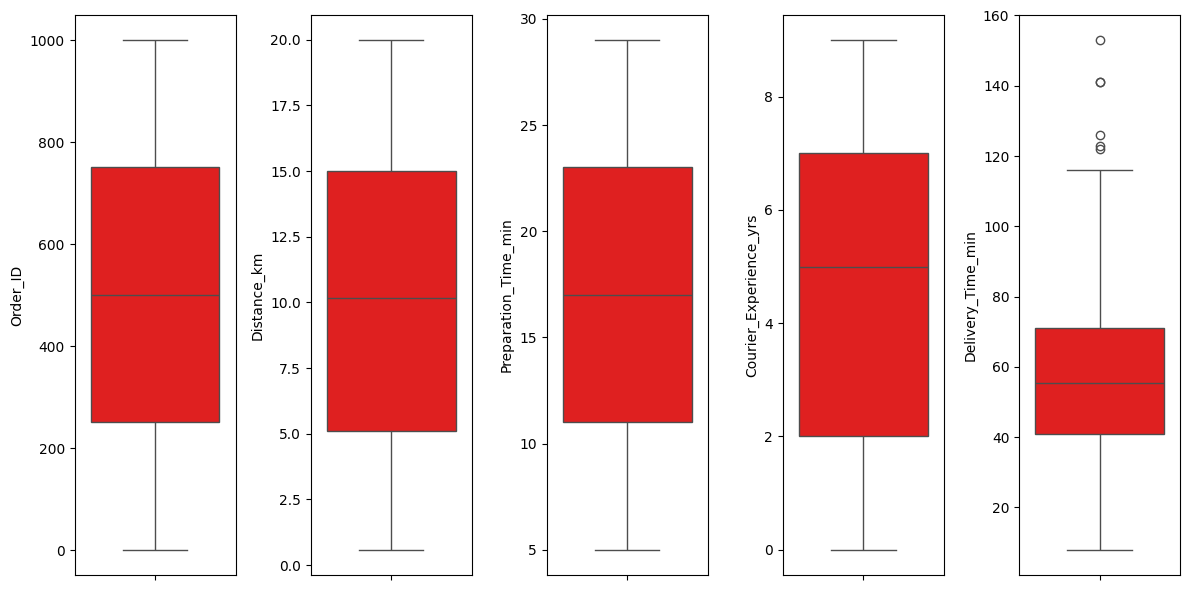

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
for i in range(0, len(numeric_columns)):
    plt.subplot(1, len(numeric_columns), i+1)
    sns.boxplot(y=df_food[numeric_columns[i]], color='red')
    plt.tight_layout()

Based on outlier, this dataset have it, but it's still kinda normal not very worse (boxplot is smashed). So, we didn't handle that.

# 3. Data Manipulation / EDA

In [ ]:
df_food.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [ ]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 1000 non-null   object 
 3   Traffic_Level           1000 non-null   object 
 4   Time_of_Day             1000 non-null   object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  1000 non-null   float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [ ]:
df_customer_1 = pd.pivot_table(
    data = df_food,
    index = 'Delivery_Time_min',
    values = 'Distance_km',
    aggfunc = 'mean'
).reset_index().sort_values(by='Delivery_Time_min', ascending = True)
df_customer_1

,Delivery_Time_min,Distance_km
0,8,1.110000
1,13,1.380000
2,14,2.150000
3,15,1.290000
4,16,1.267500
5,17,1.338750
6,18,1.555000
7,19,2.485000
8,20,1.763333
9,21,1.742857


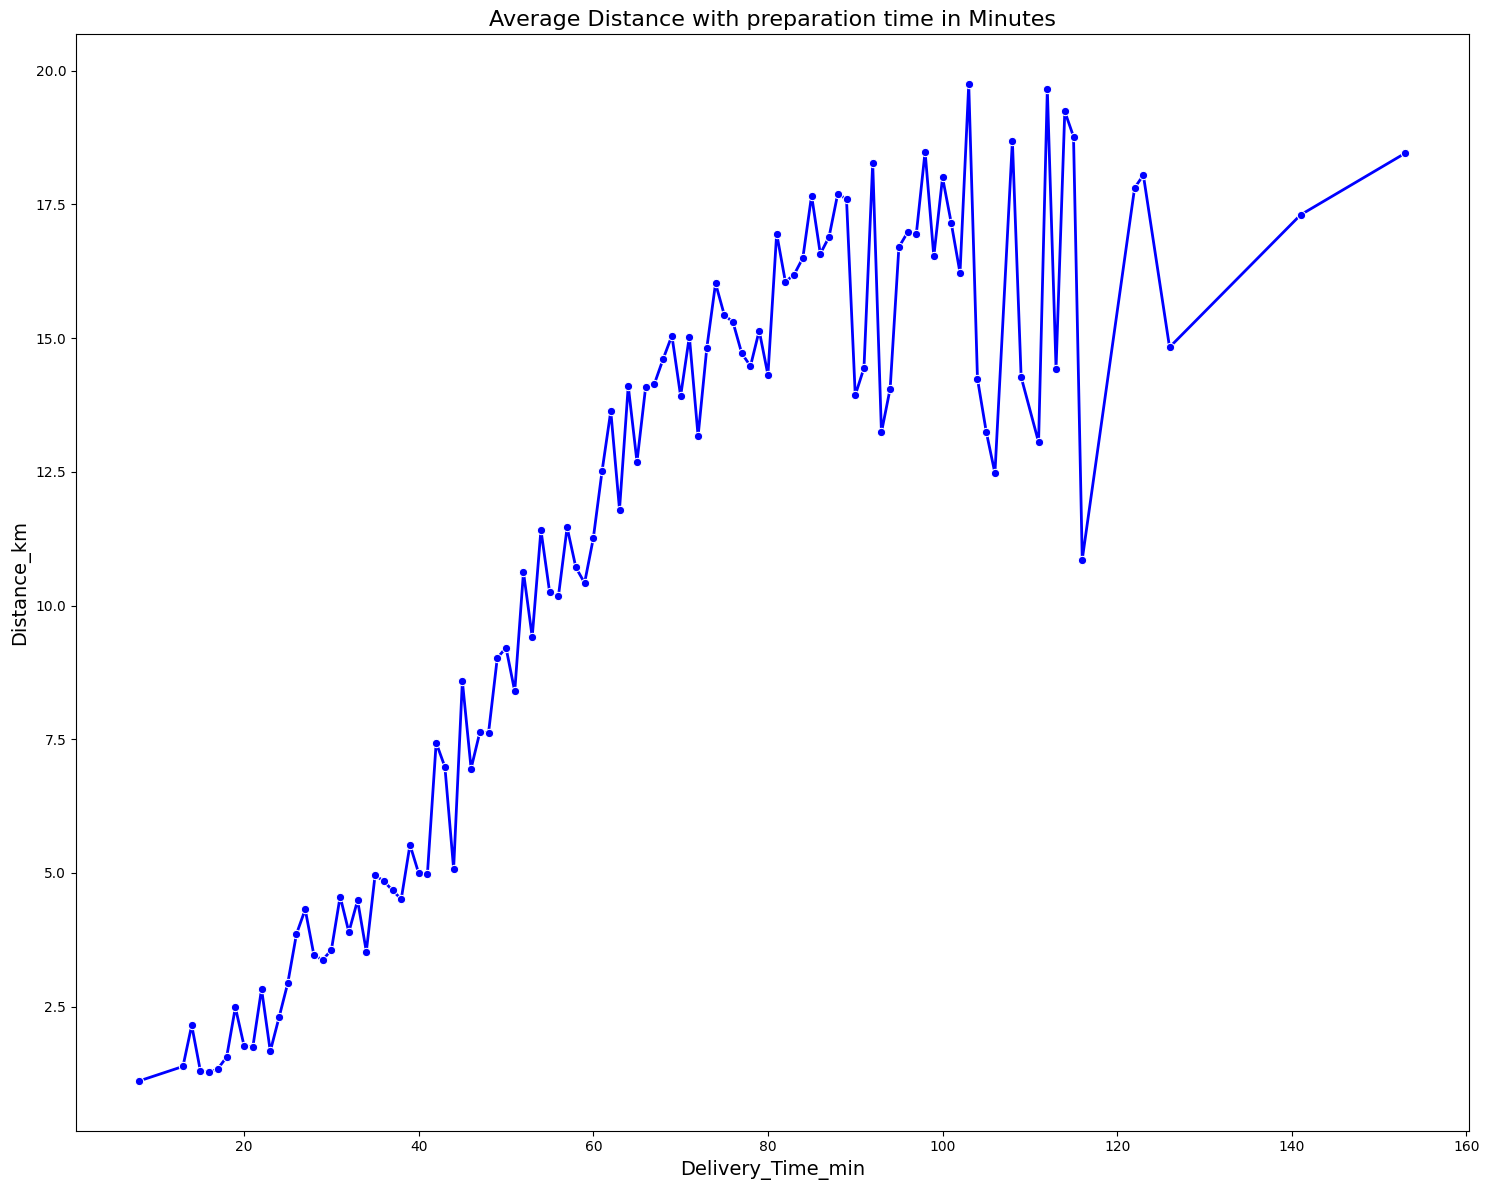

In [ ]:
# Visualisasi lineplot
plt.figure(figsize=(15, 12))
sns.lineplot(data=df_customer_1, x="Delivery_Time_min", y="Distance_km", marker="o", color="blue", linewidth=2)

# Menambahkan angka di setiap titik (Opsional)
#for x, y in zip(df_customer_1['Delivery_Time_min'], df_customer_1['Distance_km']):
#    plt.annotate(format(y, '.2f'), xy=(x, y), textcoords="offset points", xytext=(0, 5), ha='center', color='black', fontsize=8)

# Menambahkan judul dan label
plt.title("Average Distance with preparation time in Minutes", fontsize=16)
plt.xlabel("Delivery_Time_min", fontsize=14)
plt.ylabel("Distance_km", fontsize=14)
#plt.xticks(rotation=45)

plt.tight_layout()  # Menghindari elemen terpotong
plt.show()

1. is there any strong correlation for category column ? Also, is there any strong correlation from each category to the Distance_km ?
2. In which time_of_day that has the biggest average Distance_km based on vehicle_type ?
3. How was the distribution of courier_experience_yrs with the Distance_km? is it more low or high for the Distance_km ?
4. In which weather that the most average Distance_km min based on traffic_level ?

Answer :
2. In which time_of_day that has the biggest average Distance_km based on vehicle_type ?

In [ ]:
df_customer = pd.pivot_table(
    data = df_food,
    index = ['Time_of_Day', 'Vehicle_Type'],
    values = 'Distance_km',
    aggfunc = 'mean'
).reset_index().sort_values(by='Distance_km', ascending = False)
df_customer

,Time_of_Day,Vehicle_Type,Distance_km
7,Morning,Car,11.030633
8,Morning,Scooter,10.129200
1,Afternoon,Car,10.126038
6,Morning,Bike,10.119308
2,Afternoon,Scooter,10.098352
3,Evening,Bike,9.992600
0,Afternoon,Bike,9.971286
5,Evening,Scooter,9.912043
4,Evening,Car,9.715600
9,Night,Bike,9.648333


/tmp/ipython-input-2732300144.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df_food, x='Time_of_Day', y='Distance_km', hue = 'Vehicle_Type', ci=None)#, palette={'motorcycle':'darkorange', 'bicycle':'deepskyblue', 'scooter':'purple', 'electric_scooter':'darkblue' })


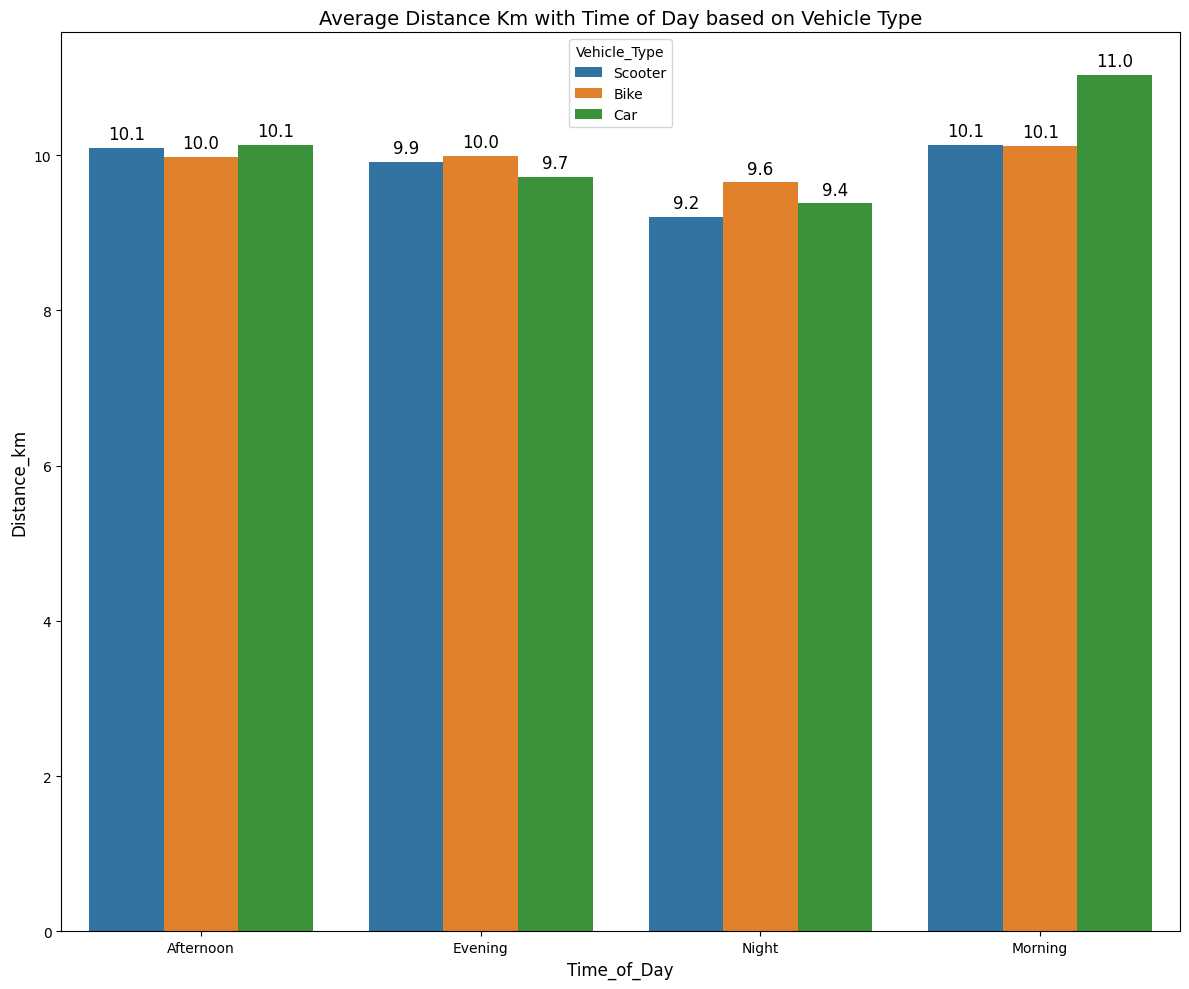

In [ ]:
# Create the bar chart with sorted values
# plt.style.use('dark_background')

plt.figure(figsize=(12, 10))

ax = sns.barplot(data=df_food, x='Time_of_Day', y='Distance_km', hue = 'Vehicle_Type', ci=None)#, palette={'motorcycle':'darkorange', 'bicycle':'deepskyblue', 'scooter':'purple', 'electric_scooter':'darkblue' })

# Set the title and labels
plt.title('Average Distance Km with Time of Day based on Vehicle Type', fontsize = 14)
plt.xlabel('Time_of_Day', fontsize = 12)
plt.ylabel('Distance_km', fontsize = 12)
#plt.xticks(rotation=45, horizontalalignment='right')

# Set the background color to grey
#plt.gca().set_facecolor('grey')

# Add count labels to the bars

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            text=format(height, '.1f'),
            xy=(p.get_x() + p.get_width() / 2, height),
            ha='center', va='center',
            xytext=(0, 10),
            textcoords='offset points',
            color='black',
            fontsize = 12
        )

plt.tight_layout()

4. In which weather that the most average Distance_km min based on traffic_level ?

In [ ]:
df_food.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [ ]:
df_delivery = pd.pivot_table(
    data = df_food,
    index = ['Weather', 'Traffic_Level'],
    values = 'Distance_km',
    aggfunc = 'mean'
).reset_index().sort_values(by='Distance_km', ascending = False)
df_delivery

,Weather,Traffic_Level,Distance_km
6,Rainy,High,12.932955
11,Snowy,Medium,12.425455
9,Snowy,High,11.129500
13,Windy,Low,10.761538
12,Windy,High,10.691304
10,Snowy,Low,10.581136
5,Foggy,Medium,10.337714
7,Rainy,Low,10.258875
1,Clear,Low,10.080538
2,Clear,Medium,9.656044


/tmp/ipython-input-80817353.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df_delivery, x='Weather', y='Distance_km', hue = 'Traffic_Level', ci=None)#, palette={'motorcycle':'darkorange', 'bicycle':'deepskyblue', 'scooter':'purple', 'electric_scooter':'darkblue' })


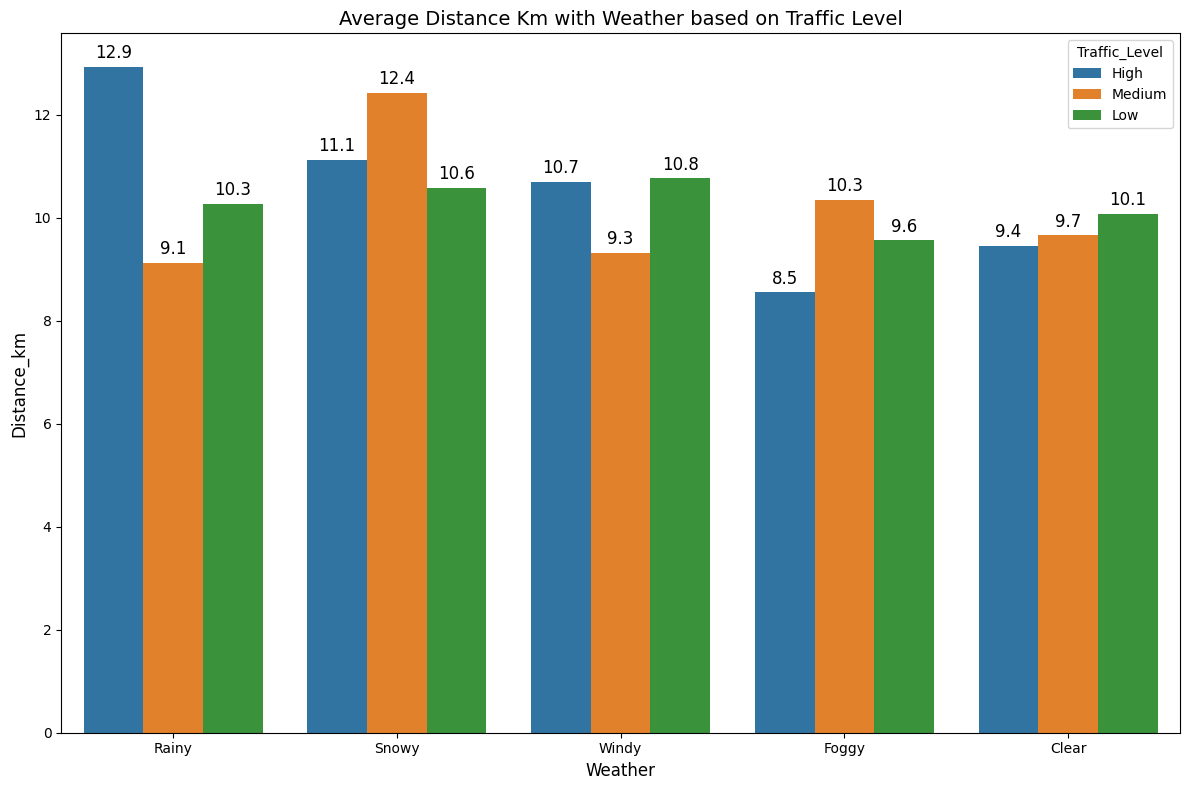

In [ ]:
# Create the bar chart with sorted values
# plt.style.use('dark_background')

plt.figure(figsize=(12, 8))

ax = sns.barplot(data=df_delivery, x='Weather', y='Distance_km', hue = 'Traffic_Level', ci=None)#, palette={'motorcycle':'darkorange', 'bicycle':'deepskyblue', 'scooter':'purple', 'electric_scooter':'darkblue' })

# Set the title and labels
plt.title('Average Distance Km with Weather based on Traffic Level', fontsize = 14)
plt.xlabel('Weather', fontsize = 12)
plt.ylabel('Distance_km', fontsize = 12)
#plt.xticks(rotation=45, horizontalalignment='right')

# Set the background color to grey
#plt.gca().set_facecolor('grey')

# Add count labels to the bars

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            text=format(height, '.1f'),
            xy=(p.get_x() + p.get_width() / 2, height),
            ha='center', va='center',
            xytext=(0, 10),
            textcoords='offset points',
            color='black',
            fontsize = 12
        )

plt.tight_layout()

3. How was the distribution of Courier_Experience_yrs with the Distance_km ? is it more low or high for the Distance_km ?

In [ ]:
df_food.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [ ]:
df_time = pd.pivot_table(
    data = df_food,
    index = 'Courier_Experience_yrs',
    values = 'Distance_km',
    aggfunc = 'mean'
).reset_index().sort_values(by = 'Courier_Experience_yrs')
df_time

,Courier_Experience_yrs,Distance_km
0,0.0,10.368242
1,1.0,10.039065
2,2.0,9.590101
3,3.0,10.588875
4,4.0,9.524043
5,5.0,9.879250
6,6.0,10.994037
7,7.0,9.929341
8,8.0,10.230594
9,9.0,9.534907


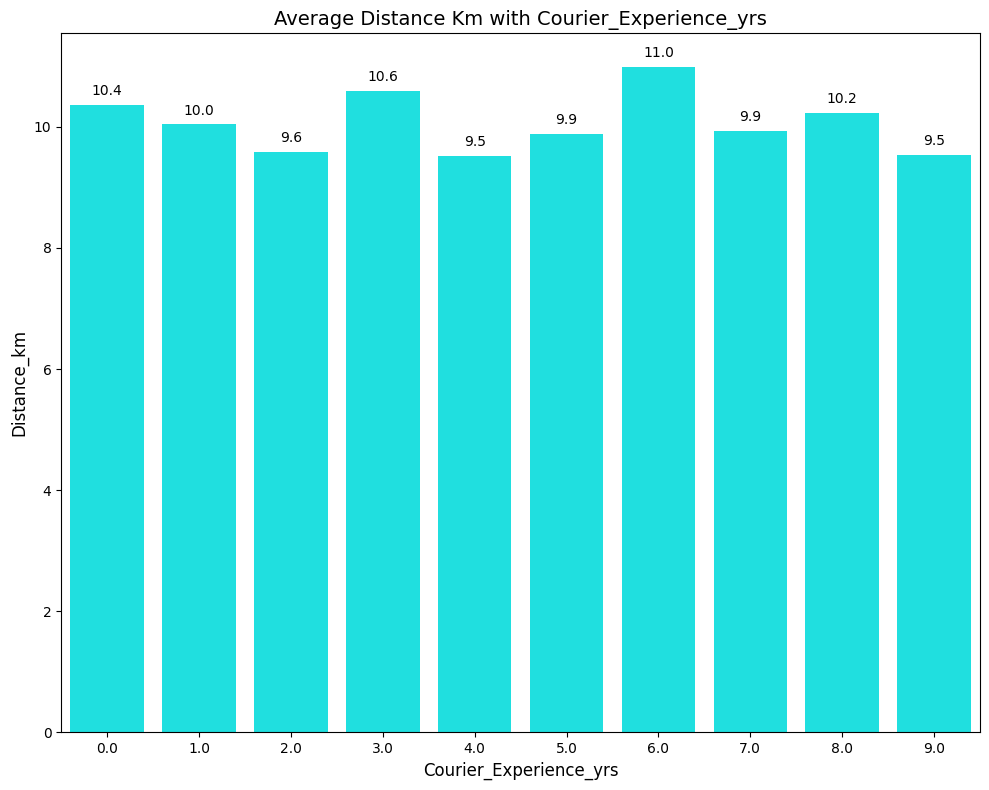

In [ ]:
# Create the bar chart with sorted values
# plt.style.use('dark_background')

plt.figure(figsize=(10, 8))

ax = sns.barplot(data=df_time, x='Courier_Experience_yrs', y='Distance_km' , color = 'cyan')#, palette={'motorcycle':'darkorange', 'bicycle':'deepskyblue', 'scooter':'purple', 'electric_scooter':'darkblue' })

# Set the title and labels
plt.title('Average Distance Km with Courier_Experience_yrs', fontsize = 14)
plt.xlabel('Courier_Experience_yrs', fontsize = 12)
plt.ylabel('Distance_km', fontsize = 12)
#plt.xticks(rotation=45, horizontalalignment='right')

# Set the background color to grey
#plt.gca().set_facecolor('grey')

# Add count labels to the bars

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            text=format(height, '.1f'),
            xy=(p.get_x() + p.get_width() / 2, height),
            ha='center', va='center',
            xytext=(0, 10),
            textcoords='offset points',
            color='black',
            fontsize = 10
        )

plt.tight_layout()

1. is there any strong correlation for category column ? Also, is there any strong correlation from each category to the Distance_km?

In [ ]:
from google.colab import drive

import numpy as np

import pandas as pd

from scipy.stats import chi2_contingency, ttest_ind
from scipy.stats.contingency import association

import seaborn as sns

import shap

from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
  classification_report,
  PrecisionRecallDisplay,
  RocCurveDisplay,
)
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import (
  LabelEncoder,
  MinMaxScaler,
  OneHotEncoder,
  OrdinalEncoder,
)

import xgboost as xgb

pd.set_option("display.max_columns", None) # show all columns
pd.set_option("display.max_rows", None) # show all rows

In [ ]:
df_correlation_1 = df_food.copy()
df_correlation_1.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [ ]:
df_correlation_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 1000 non-null   object 
 3   Traffic_Level           1000 non-null   object 
 4   Time_of_Day             1000 non-null   object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  1000 non-null   float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [ ]:
#df_correlation_1 = df_correlation_1.astype({"Preparation_Time_min":'str'})
#df_correlation_1.dtypes

In [ ]:
target_column = ['Distance_km']

#ordinal_columns = [
#  'PhoneService',
#  'MultipleLines',

#  'InternetService',
#  'OnlineSecurity',
#  'OnlineBackup',
#  'DeviceProtection',
#  'TechSupport',
#  'StreamingTV',
#  'StreamingMovies',
#]

nominal_columns = [
  'Weather',
  'Traffic_Level',
  'Time_of_Day',
  'Vehicle_Type'
]

category_columns_1 = nominal_columns #+ ordinal_columns

numeric_columns = [
  'Preparation_Time_min',
  'Courier_Experience_yrs',
  'Delivery_Time_min'
]
numeric_columns_1 = numeric_columns + target_column

In [ ]:
def show_relationship_category_numeric(cat, num):
  df_temp = df_correlation_1[[cat, num, 'Order_ID']].copy()
  df_temp[num] = pd.qcut(
    df_temp[num],
    4,
    labels=['low','midlow','midhigh','high'],
  )

  df_temp = df_temp.pivot_table(
    index = cat,
    columns = num,
    values = 'Order_ID',
    aggfunc = 'nunique',
    observed=False,
  )
  df_temp = df_temp.fillna(0)
  df_temp = df_temp.astype(int)

  res = chi2_contingency(df_temp)
  coef = round(association(df_temp, method='cramer'), 2)

  return df_temp, ('' if res.pvalue > 0.05 else '< 0.05'), coef

In [ ]:
df_corr_cat_num = pd.DataFrame()

for i in range(len(category_columns_1)):
  column1 = category_columns_1[i]
  for j in range(len(numeric_columns_1)):
    column2 = numeric_columns_1[j]
    _, pvalue, coef = show_relationship_category_numeric(column1, column2)

    df_temp = pd.DataFrame({
      'column1': [column1],
      'column2': [column2],
      'pvalue': [pvalue],
      'coef': [coef],
    })
    df_corr_cat_num = pd.concat([df_corr_cat_num, df_temp])

df_corr_cat_num

,column1,column2,pvalue,coef
0,Weather,Preparation_Time_min,,0.07
0,Weather,Courier_Experience_yrs,< 0.05,0.10
0,Weather,Delivery_Time_min,< 0.05,0.10
0,Weather,Distance_km,,0.07
0,Traffic_Level,Preparation_Time_min,,0.06
0,Traffic_Level,Courier_Experience_yrs,,0.06
0,Traffic_Level,Delivery_Time_min,< 0.05,0.13
0,Traffic_Level,Distance_km,,0.05
0,Time_of_Day,Preparation_Time_min,,0.03
0,Time_of_Day,Courier_Experience_yrs,< 0.05,0.08


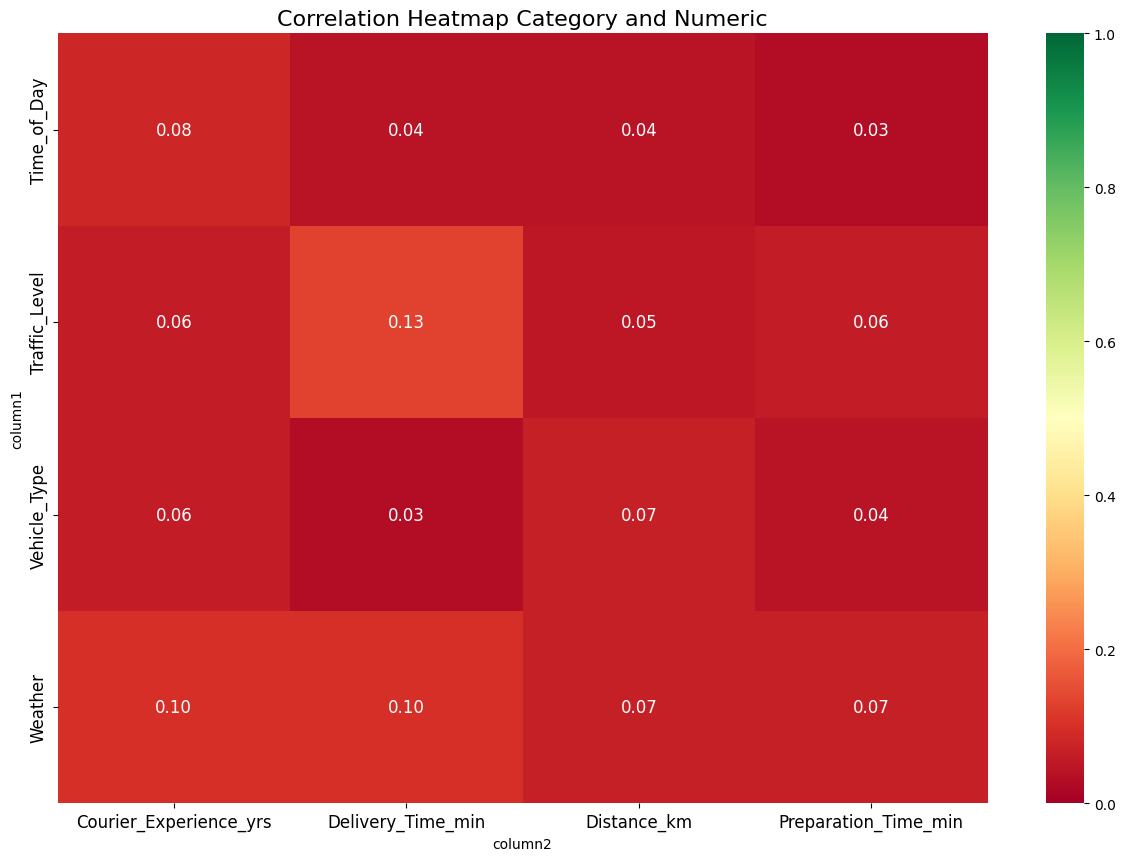

In [ ]:
df_temp_1 = df_corr_cat_num.pivot_table(
  index='column1',
  columns='column2',
  values='coef',
)

for column1 in df_corr_cat_num['column1']:
  for column2 in df_corr_cat_num['column2']:
    if np.isnan(df_temp_1.loc[column1, column2]) and column1 < column2:
      df_temp_1.loc[column1, column2] = df_temp_1.loc[column2, column1]
      df_temp_1.loc[column2, column1] = None

plt.figure(figsize=(15, 10))
sns.heatmap(
  df_temp_1,
  vmin = 0,
  vmax = 1,
  cmap = 'RdYlGn',
  fmt=".2f",
  annot=True,
  annot_kws={"fontsize": 12}
)
plt.xticks(fontsize=12)  # <<< perbesar label sumbu X
plt.yticks(fontsize=12)  # <<< perbesar label sumbu Y
plt.title('Correlation Heatmap Category and Numeric', fontsize=16)
plt.show()

# Feature Enginering

In [ ]:
df_food.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [ ]:
df_food_1 = df_food.drop(['Order_ID'], axis = 1)
#df_fraud = df_fraud.drop(['Transaction_ID'], axis = 1)
#df_bank_1['attrition_flag'] = df_bank_1['attrition_flag'].replace({'Attrited Customer': 1, 'Existing Customer': 0})
df_food_1.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [ ]:
df_food_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance_km             1000 non-null   float64
 1   Weather                 1000 non-null   object 
 2   Traffic_Level           1000 non-null   object 
 3   Time_of_Day             1000 non-null   object 
 4   Vehicle_Type            1000 non-null   object 
 5   Preparation_Time_min    1000 non-null   int64  
 6   Courier_Experience_yrs  1000 non-null   float64
 7   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [ ]:
# cretate predictor variables as X
X = df_food_1.drop(['Distance_km'], axis = 1)
# create target data as y
y = df_food_1['Distance_km']

In [ ]:
# split data to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42) #stratify = y, random_state= 42)

## A. Train & Test

In [ ]:
X_train.head()

,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
29,Clear,Medium,Evening,Scooter,10,7.0,123
535,Clear,High,Evening,Bike,18,3.0,34
695,Clear,High,Afternoon,Bike,17,9.0,33
557,Rainy,Low,Evening,Car,27,6.0,50
836,Rainy,Medium,Afternoon,Car,8,3.0,33


In [ ]:
X_test.head()

,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
521,Clear,Low,Evening,Bike,16,5.0,32
737,Clear,Medium,Evening,Bike,25,3.0,68
740,Rainy,High,Evening,Bike,14,6.0,39
660,Clear,Medium,Evening,Scooter,24,2.0,44
411,Clear,Low,Night,Car,23,0.0,85


### A.1 Multicolinarity

In [ ]:
kolom_baru = X_train.select_dtypes(include='number').columns.tolist()
kolom_baru

['Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']

In [ ]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(X_train[kolom_baru])

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,Preparation_Time_min,1.105151
2,Courier_Experience_yrs,1.009099
3,Delivery_Time_min,1.110206


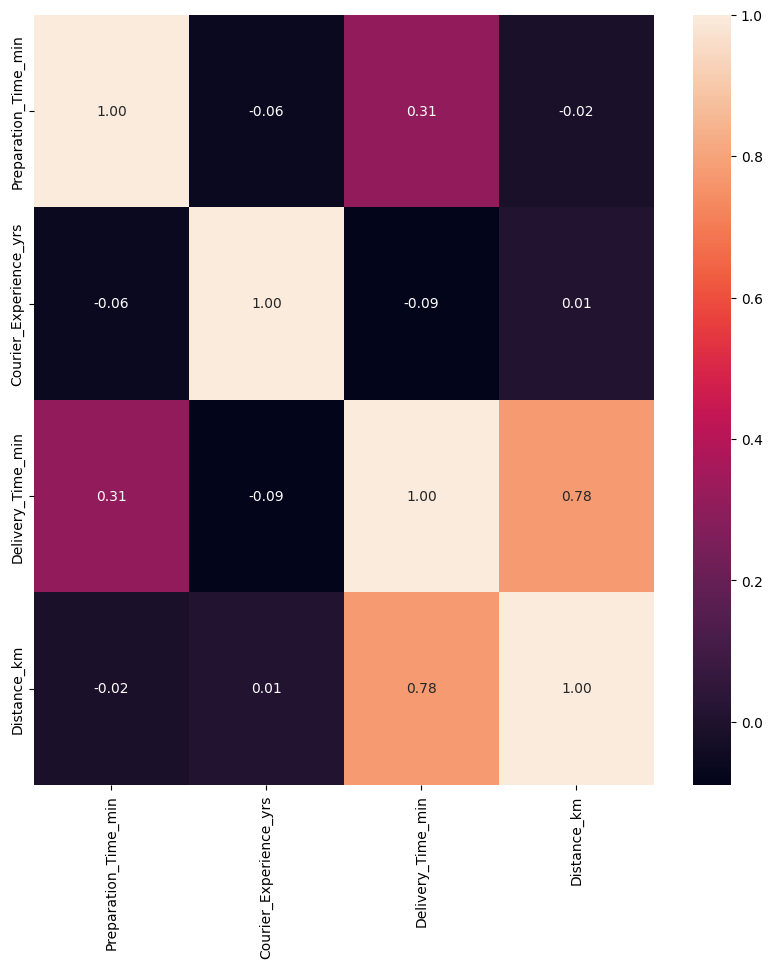

In [ ]:
# heatmap correlation
admit_train = pd.concat([X_train[kolom_baru], y_train], axis=1)
corr = admit_train.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

Based on the multicolinarity, i think this feature is still normal (not overpowering for each column on it over 0.8 for each feature)

### A.2 Encoding



#### A.2.1 One Hot Encoding & Scalling

In [ ]:
#from sklearn.model_selection import cross_val_score, train_test_split
#from sklearn.preprocessing import (
#  LabelEncoder,
#  MinMaxScaler,
#  OneHotEncoder,
#  OrdinalEncoder,
#)
#from sklearn.compose import ColumnTransformer

In [ ]:
#categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()

#encoder = OneHotEncoder(sparse_output = False, handle_unknown="ignore")

#one_hot_encoded = encoder.fit_transform(X_train[categorical_columns])

#df_encoded = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
#df_encoded.index = X_train.index

#df_encoded = pd.concat([X_train, df_encoded], axis=1)

#X_train = df_encoded.drop(columns = categorical_columns)
#X_train.head()

In [ ]:
target_column = 'Distance_km'

numerical_features = [
    'Preparation_Time_min',
    'Delivery_Time_min',
    'Courier_Experience_yrs'
]

categorical_multiclass = [
    'Weather',
    'Traffic_Level',
    'Time_of_Day',
    'Vehicle_Type'
]

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Tambahkan OneHotEncoder di sini
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

# Define transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize features
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine transformers
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_multiclass)
])

# Fit ONLY on training data
preprocessor.fit(X_train)

# Transform both sets
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Save the preprocessor
joblib.dump(preprocessor, 'preprocessor.joblib')

['preprocessor.joblib']

In [ ]:
print("✅ Shape Training:", X_train_processed.shape)
print("🔢 Scaling Numerical Example:")
print(X_train_processed[:3, :3])

print("\n🔠 Encode Categorical Exemple:")
print(X_train_processed[:3, -5:])

✅ Shape Training: (800, 18)
🔢 Scaling Numerical Example:
[[-0.98072124  2.96190014  0.82083289]
 [ 0.12685172 -1.03543272 -0.55799401]
 [-0.0115949  -1.08034658  1.51024634]]

🔠 Encode Categorical Exemple:
[[0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [ ]:
#categorical_columns = X_test.select_dtypes(include=['object']).columns.tolist()

#encoder = OneHotEncoder(sparse_output=False)

#one_hot_encoded_1 = encoder.transform(X_test[categorical_columns])

#df_encoded = pd.DataFrame(one_hot_encoded_1, columns=encoder.get_feature_names_out(categorical_columns))
#df_encoded.index = X_test.index

#df_encoded = pd.concat([X_test, df_encoded], axis=1)

#X_test = df_encoded.drop(columns = categorical_columns)
#X_test.head()

# Modelling

## Linear Regression

### A.1 No Tunning

In [ ]:
# 1. Linear Regression (Default)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

def calculate_regression_metrics(y_true, y_pred):
    """Standard metric calculation for all regression models"""
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAPE': np.mean(np.abs((y_true - y_pred) / np.maximum(1e-10, y_true))) * 100,
        'R2': r2_score(y_true, y_pred)
    }

# Initialize model
model_lr_default = LinearRegression()

# Training
model_lr_default.fit(X_train_processed, y_train)

# Predictions
pred_train_lr_default = model_lr_default.predict(X_train_processed)
pred_test_lr_default = model_lr_default.predict(X_test_processed)

# Store results
results_lr_default = {
    'model': model_lr_default,
    'params': model_lr_default.get_params(),
    'predictions': {
        'train': pred_train_lr_default,
        'test': pred_test_lr_default
    },
    'metrics': {
        'train': calculate_regression_metrics(y_train, pred_train_lr_default),
        'test': calculate_regression_metrics(y_test, pred_test_lr_default)
    },
    'metadata': {
        'model_type': 'Linear Regression',
        'version': 'default'
    }
}

# Display metrics
print("🔵 LINEAR REGRESSION (DEFAULT) RESULTS")
metrics_lr_default = pd.DataFrame(results_lr_default['metrics']).round(4)
print(metrics_lr_default)

🔵 LINEAR REGRESSION (DEFAULT) RESULTS
        train     test
MAE    2.1095   1.9852
RMSE   3.0483   2.6821
MAPE  39.8768  38.8215
R2     0.7162   0.7686


### A.2 Tunning

#### Ridge Regression

In [ ]:
# 2. Ridge Regression (Tuned)
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

# Parameter grid untuk tuning
ridge_tune_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr']
}

# Initialize base model
model_ridge_base = Ridge(random_state=42)

# Grid Search setup
grid_ridge_v1 = GridSearchCV(
    estimator=model_ridge_base,
    param_grid=ridge_tune_params,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_ridge_v1.fit(X_train_processed, y_train)

# Get best model
model_ridge_tuned = grid_ridge_v1.best_estimator_

# Predictions
pred_train_ridge_tuned = model_ridge_tuned.predict(X_train_processed)
pred_test_ridge_tuned = model_ridge_tuned.predict(X_test_processed)

# Store results
results_ridge_tuned = {
    'model': model_ridge_tuned,
    'grid_search': grid_ridge_v1,
    'best_params': grid_ridge_v1.best_params_,
    'params': model_ridge_tuned.get_params(),
    'predictions': {
        'train': pred_train_ridge_tuned,
        'test': pred_test_ridge_tuned
    },
    'metrics': {
        'train': calculate_regression_metrics(y_train, pred_train_ridge_tuned),
        'test': calculate_regression_metrics(y_test, pred_test_ridge_tuned)
    },
    'metadata': {
        'model_type': 'Ridge Regression',
        'version': 'tuned_v1',
        'tuning_method': 'GridSearchCV'
    }
}

# Display results
print("🔵 RIDGE REGRESSION (TUNED) RESULTS")
print("🎯 Best Parameters:", results_ridge_tuned['best_params'])
print("\n📊 Performance Metrics:")
metrics_ridge_tuned = pd.DataFrame(results_ridge_tuned['metrics']).round(4)
print(metrics_ridge_tuned)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
🔵 RIDGE REGRESSION (TUNED) RESULTS
🎯 Best Parameters: {'alpha': 10, 'fit_intercept': True, 'solver': 'svd'}

📊 Performance Metrics:
        train     test
MAE    2.1345   2.0174
RMSE   3.0505   2.7055
MAPE  41.3491  40.1483
R2     0.7158   0.7645


#### Lasso Regression

In [ ]:
# 3. Lasso Regression (Tuned)
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

# Parameter grid untuk tuning
lasso_tune_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],   # sama seperti Ridge, bisa diperluas
    'fit_intercept': [True, False],
    'max_iter': [1000, 5000, 10000]            # penting di Lasso biar konvergen
}

# Initialize base model
model_lasso_base = Lasso(random_state=42)

# Grid Search setup
grid_lasso_v1 = GridSearchCV(
    estimator=model_lasso_base,
    param_grid=lasso_tune_params,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_lasso_v1.fit(X_train_processed, y_train)

# Get best model
model_lasso_tuned = grid_lasso_v1.best_estimator_

# Predictions
pred_train_lasso_tuned = model_lasso_tuned.predict(X_train_processed)
pred_test_lasso_tuned = model_lasso_tuned.predict(X_test_processed)

# Store results
results_lasso_tuned = {
    'model': model_lasso_tuned,
    'grid_search': grid_lasso_v1,
    'best_params': grid_lasso_v1.best_params_,
    'params': model_lasso_tuned.get_params(),
    'predictions': {
        'train': pred_train_lasso_tuned,
        'test': pred_test_lasso_tuned
    },
    'metrics': {
        'train': calculate_regression_metrics(y_train, pred_train_lasso_tuned),
        'test': calculate_regression_metrics(y_test, pred_test_lasso_tuned)
    },
    'metadata': {
        'model_type': 'Lasso Regression',
        'version': 'tuned_v1',
        'tuning_method': 'GridSearchCV'
    }
}

# Display results
print("🟠 LASSO REGRESSION (TUNED) RESULTS")
print("🎯 Best Parameters:", results_lasso_tuned['best_params'])
print("\n📊 Performance Metrics:")
metrics_lasso_tuned = pd.DataFrame(results_lasso_tuned['metrics']).round(4)
print(metrics_lasso_tuned)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
🟠 LASSO REGRESSION (TUNED) RESULTS
🎯 Best Parameters: {'alpha': 0.01, 'fit_intercept': True, 'max_iter': 1000}

📊 Performance Metrics:
        train     test
MAE    2.1159   1.9925
RMSE   3.0497   2.6877
MAPE  40.3819  39.0862
R2     0.7160   0.7676


## Random Forest

### B.1 No tunning

In [ ]:
# 4. Random Forest (Default)
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Initialize model
model_rf_default = RandomForestRegressor(
    random_state=42,
    n_jobs=-1,
    verbose=0
)

# Training
model_rf_default.fit(X_train_processed, y_train)

# Predictions
pred_train_rf_default = model_rf_default.predict(X_train_processed)
pred_test_rf_default = model_rf_default.predict(X_test_processed)

# Store results (minimalis)
results_rf_default = {
    'model': model_rf_default,
    'params': model_rf_default.get_params(),
    'predictions': {
        'train': pred_train_rf_default,
        'test': pred_test_rf_default
    },
    'metrics': {
        'train': calculate_regression_metrics(y_train, pred_train_rf_default),
        'test': calculate_regression_metrics(y_test, pred_test_rf_default)
    },
    'metadata': {
        'model_type': 'Random Forest',
        'version': 'default'
    }
}

# Display metrics
print("🌲 RANDOM FOREST (DEFAULT) RESULTS")
print(pd.DataFrame(results_rf_default['metrics']).round(4))

🌲 RANDOM FOREST (DEFAULT) RESULTS
        train     test
MAE    0.7525   1.9147
RMSE   1.0389   2.5921
MAPE  12.2091  30.7636
R2     0.9670   0.7838


### B.2 Tunning

In [ ]:
# 5. Random Forest (Tuned) - STANDARD VERSION
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import pandas as pd

# Parameter distributions
rf_tune_params = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(range(5, 30)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

# Initialize base model
model_rf_base = RandomForestRegressor(
    random_state=42,
    n_jobs=-1,
    verbose=0
)

# Randomized Search
search_rf_tuned = RandomizedSearchCV(
    estimator=model_rf_base,
    param_distributions=rf_tune_params,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit model
search_rf_tuned.fit(X_train_processed, y_train)

# Get best model
model_rf_tuned = search_rf_tuned.best_estimator_

# Generate predictions
pred_train_rf_tuned = model_rf_tuned.predict(X_train_processed)
pred_test_rf_tuned = model_rf_tuned.predict(X_test_processed)

# Store results
results_rf_tuned = {
    'model': model_rf_tuned,
    'search': search_rf_tuned,
    'best_params': search_rf_tuned.best_params_,
    'params': model_rf_tuned.get_params(),
    'predictions': {
        'train': pred_train_rf_tuned,
        'test': pred_test_rf_tuned
    },
    'metrics': {
        'train': calculate_regression_metrics(y_train, pred_train_rf_tuned),
        'test': calculate_regression_metrics(y_test, pred_test_rf_tuned)
    },
    'metadata': {
        'model_type': 'Random Forest',
        'version': 'tuned_v1',
        'tuning_method': 'RandomizedSearchCV'
    }
}

# Display results
print("🌲 RANDOM FOREST (TUNED) RESULTS")
print("🎯 Best Parameters:", results_rf_tuned['best_params'])
print("\n📊 Performance Metrics:")
print(pd.DataFrame(results_rf_tuned['metrics']).round(4))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
🌲 RANDOM FOREST (TUNED) RESULTS
🎯 Best Parameters: {'bootstrap': True, 'max_depth': 13, 'min_samples_leaf': 3, 'min_samples_split': 13, 'n_estimators': 154}

📊 Performance Metrics:
        train     test
MAE    1.4313   1.8951
RMSE   1.9841   2.5459
MAPE  23.9917  31.4252
R2     0.8798   0.7915


## Catboost

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.0 MB/s eta 0:00:00


### C.1 No Tunning

In [ ]:
# 5. CatBoost (Default)
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Initialize model
model_cb_default = CatBoostRegressor(
    random_state=42,
    verbose=0,      # 0 biar tidak spam log training
    thread_count=-1 # gunakan semua core
)

# Training
model_cb_default.fit(X_train_processed, y_train)

# Predictions
pred_train_cb_default = model_cb_default.predict(X_train_processed)
pred_test_cb_default = model_cb_default.predict(X_test_processed)

# Store results
results_cb_default = {
    'model': model_cb_default,
    'params': model_cb_default.get_params(),
    'predictions': {
        'train': pred_train_cb_default,
        'test': pred_test_cb_default
    },
    'metrics': {
        'train': calculate_regression_metrics(y_train, pred_train_cb_default),
        'test': calculate_regression_metrics(y_test, pred_test_cb_default)
    },
    'metadata': {
        'model_type': 'CatBoost',
        'version': 'default'
    }
}

# Display metrics
print("🐱 CATBOOST (DEFAULT) RESULTS")
print(pd.DataFrame(results_cb_default['metrics']).round(4))

🐱 CATBOOST (DEFAULT) RESULTS
       train     test
MAE   0.7133   1.7771
RMSE  0.9483   2.5321
MAPE  9.9047  25.5049
R2    0.9725   0.7937


### C.2 Tunning

In [ ]:
# 6. CatBoost (Tuned) - STANDARD VERSION
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import pandas as pd

# Parameter distributions
cb_tune_params = {
    'depth': randint(4, 10),                # kedalaman tree
    'learning_rate': uniform(0.01, 0.3),    # rate learning
    'iterations': randint(200, 1000),       # jumlah boosting rounds
    'l2_leaf_reg': uniform(1, 10),          # regulasi L2
    'bagging_temperature': uniform(0, 5),   # subsampling
    'border_count': randint(32, 255)        # untuk fitur numerik
}

# Initialize base model
model_cb_base = CatBoostRegressor(
    random_state=42,
    verbose=0,
    thread_count=-1
)

# Randomized Search
search_cb_tuned = RandomizedSearchCV(
    estimator=model_cb_base,
    param_distributions=cb_tune_params,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit model
search_cb_tuned.fit(X_train_processed, y_train)

# Get best model
model_cb_tuned = search_cb_tuned.best_estimator_

# Generate predictions
pred_train_cb_tuned = model_cb_tuned.predict(X_train_processed)
pred_test_cb_tuned = model_cb_tuned.predict(X_test_processed)

# Store results
results_cb_tuned = {
    'model': model_cb_tuned,
    'search': search_cb_tuned,
    'best_params': search_cb_tuned.best_params_,
    'params': model_cb_tuned.get_params(),
    'predictions': {
        'train': pred_train_cb_tuned,
        'test': pred_test_cb_tuned
    },
    'metrics': {
        'train': calculate_regression_metrics(y_train, pred_train_cb_tuned),
        'test': calculate_regression_metrics(y_test, pred_test_cb_tuned)
    },
    'metadata': {
        'model_type': 'CatBoost',
        'version': 'tuned_v1',
        'tuning_method': 'RandomizedSearchCV'
    }
}

# Display results
print("🐱 CATBOOST (TUNED) RESULTS")
print("🎯 Best Parameters:", results_cb_tuned['best_params'])
print("\n📊 Performance Metrics:")
print(pd.DataFrame(results_cb_tuned['metrics']).round(4))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
🐱 CATBOOST (TUNED) RESULTS
🎯 Best Parameters: {'bagging_temperature': 0.9091248360355031, 'border_count': 52, 'depth': 4, 'iterations': 659, 'l2_leaf_reg': 7.116531604882809, 'learning_rate': 0.012119891565915222}

📊 Performance Metrics:
        train     test
MAE    1.6889   1.7573
RMSE   2.2792   2.4172
MAPE  28.6263  30.1717
R2     0.8414   0.8120


## GradientBoost

### E.1 No Tunning

In [ ]:
# 6. GradientBoosting (Default)
from sklearn.ensemble import GradientBoostingRegressor

# Initialize model
model_gb_default = GradientBoostingRegressor(
    random_state=42
)

# Training
model_gb_default.fit(X_train_processed, y_train)

# Predictions
pred_train_gb_default = model_gb_default.predict(X_train_processed)
pred_test_gb_default = model_gb_default.predict(X_test_processed)

# Store results
results_gb_default = {
    'model': model_gb_default,
    'params': model_gb_default.get_params(),
    'predictions': {
        'train': pred_train_gb_default,
        'test': pred_test_gb_default
    },
    'metrics': {
        'train': calculate_regression_metrics(y_train, pred_train_gb_default),
        'test': calculate_regression_metrics(y_test, pred_test_gb_default)
    },
    'metadata': {
        'model_type': 'GradientBoosting',
        'version': 'default'
    }
}

# Display metrics
print("🌳 GRADIENT BOOSTING (DEFAULT) RESULTS")
print(pd.DataFrame(results_gb_default['metrics']).round(4))

🌳 GRADIENT BOOSTING (DEFAULT) RESULTS
        train     test
MAE    1.4423   1.8263
RMSE   1.9542   2.6015
MAPE  21.2099  28.6209
R2     0.8834   0.7823


### E.2 Tunning

In [ ]:
# 7. GradientBoosting (Tuned) - STANDARD VERSION
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Parameter grid
gb_tune_params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'loss': ['squared_error', 'absolute_error', 'huber']
}

# Initialize base model
model_gb_base = GradientBoostingRegressor(
    random_state=42
)

# Grid Search setup
search_gb_tuned = GridSearchCV(
    estimator=model_gb_base,
    param_grid=gb_tune_params,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

# Fit model
search_gb_tuned.fit(X_train_processed, y_train)

# Get best model
model_gb_tuned = search_gb_tuned.best_estimator_

# Generate predictions
pred_train_gb_tuned = model_gb_tuned.predict(X_train_processed)
pred_test_gb_tuned = model_gb_tuned.predict(X_test_processed)

# Store results
results_gb_tuned = {
    'model': model_gb_tuned,
    'search': search_gb_tuned,
    'best_params': search_gb_tuned.best_params_,
    'params': model_gb_tuned.get_params(),
    'predictions': {
        'train': pred_train_gb_tuned,
        'test': pred_test_gb_tuned
    },
    'metrics': {
        'train': calculate_regression_metrics(y_train, pred_train_gb_tuned),
        'test': calculate_regression_metrics(y_test, pred_test_gb_tuned)
    },
    'metadata': {
        'model_type': 'GradientBoosting',
        'version': 'tuned_v1',
        'tuning_method': 'GridSearchCV'
    }
}

# Display results
print("🌳 GRADIENT BOOSTING (TUNED) RESULTS")
print("🎯 Best Parameters:", results_gb_tuned['best_params'])
print("\n📊 Performance Metrics:")
print(pd.DataFrame(results_gb_tuned['metrics']).round(4))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
🌳 GRADIENT BOOSTING (TUNED) RESULTS
🎯 Best Parameters: {'learning_rate': 0.05, 'loss': 'absolute_error', 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}

📊 Performance Metrics:
        train     test
MAE    1.4861   1.7465
RMSE   2.2849   2.5148
MAPE  20.6578  25.8569
R2     0.8406   0.7965


## XGBoost

### D.1 No tunning

In [ ]:
# 5. XGBoost (Default)
from xgboost import XGBRegressor
import pandas as pd

# Initialize model
model_xgb_default = XGBRegressor(
    random_state=42,
    n_jobs=-1,
    eval_metric='rmse',
    verbosity=0
)

# Training
model_xgb_default.fit(X_train_processed, y_train)

# Predictions
pred_train_xgb_default = model_xgb_default.predict(X_train_processed)
pred_test_xgb_default = model_xgb_default.predict(X_test_processed)

# Store results
results_xgb_default = {
    'model': model_xgb_default,
    'params': model_xgb_default.get_params(),
    'predictions': {
        'train': pred_train_xgb_default,
        'test': pred_test_xgb_default
    },
    'metrics': {
        'train': calculate_regression_metrics(y_train, pred_train_xgb_default),
        'test': calculate_regression_metrics(y_test, pred_test_xgb_default)
    },
    'metadata': {
        'model_type': 'XGBoost',
        'version': 'default',
        'note': 'Default hyperparameters'
    }
}

# Display metrics
print("⚡ XGBOOST (DEFAULT) RESULTS")
metrics_xgb_default = pd.DataFrame(results_xgb_default['metrics']).round(4)
print(metrics_xgb_default)

⚡ XGBOOST (DEFAULT) RESULTS
       train     test
MAE   0.1282   1.9173
RMSE  0.2027   2.7310
MAPE  1.8506  28.4477
R2    0.9987   0.7601


### D.2 Tunning

In [ ]:
# 6. XGBoost (Tuned) - STANDARD VERSION
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Parameter grid
xgb_tune_params = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 6, 9],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Initialize base model
model_xgb_base = XGBRegressor(
    random_state=42,
    n_jobs=-1,
    eval_metric='rmse',
    verbosity=0
)

# Grid Search setup
search_xgb_tuned = GridSearchCV(
    estimator=model_xgb_base,
    param_grid=xgb_tune_params,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

# Fit model
search_xgb_tuned.fit(X_train_processed, y_train)

# Get best model
model_xgb_tuned = search_xgb_tuned.best_estimator_

# Generate predictions
pred_train_xgb_tuned = model_xgb_tuned.predict(X_train_processed)
pred_test_xgb_tuned = model_xgb_tuned.predict(X_test_processed)

# Store results
results_xgb_tuned = {
    'model': model_xgb_tuned,
    'search': search_xgb_tuned,
    'best_params': search_xgb_tuned.best_params_,
    'params': model_xgb_tuned.get_params(),
    'predictions': {
        'train': pred_train_xgb_tuned,
        'test': pred_test_xgb_tuned
    },
    'metrics': {
        'train': calculate_regression_metrics(y_train, pred_train_xgb_tuned),
        'test': calculate_regression_metrics(y_test, pred_test_xgb_tuned)
    },
    'metadata': {
        'model_type': 'XGBoost',
        'version': 'tuned_v1',
        'tuning_method': 'GridSearchCV'
    }
}

# Display results
print("⚡ XGBOOST (TUNED) RESULTS")
print("🎯 Best Parameters:", results_xgb_tuned['best_params'])
print("\n📊 Performance Metrics:")
print(pd.DataFrame(results_xgb_tuned['metrics']).round(4))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
⚡ XGBOOST (TUNED) RESULTS
🎯 Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

📊 Performance Metrics:
        train     test
MAE    1.4322   1.7927
RMSE   1.9560   2.4925
MAPE  21.5150  28.5353
R2     0.8832   0.8001


## Decision Tree

### E.1 No Tunning

In [ ]:
# 5. Decision Tree (Default)
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

# Initialize model
model_dt_default = DecisionTreeRegressor(
    random_state=42
)

# Training
model_dt_default.fit(X_train_processed, y_train)

# Predictions
pred_train_dt_default = model_dt_default.predict(X_train_processed)
pred_test_dt_default = model_dt_default.predict(X_test_processed)

# Store results
results_dt_default = {
    'model': model_dt_default,
    'params': model_dt_default.get_params(),
    'predictions': {
        'train': pred_train_dt_default,
        'test': pred_test_dt_default
    },
    'metrics': {
        'train': calculate_regression_metrics(y_train, pred_train_dt_default),
        'test': calculate_regression_metrics(y_test, pred_test_dt_default)
    },
    'metadata': {
        'model_type': 'Decision Tree',
        'version': 'default'
    }
}

# Display metrics
print("🌳 DECISION TREE (DEFAULT) RESULTS")
print(pd.DataFrame(results_dt_default['metrics']).round(4))

🌳 DECISION TREE (DEFAULT) RESULTS
      train     test
MAE     0.0   2.3132
RMSE    0.0   3.2895
MAPE    0.0  34.4013
R2      1.0   0.6519


### E.2 Tunning

In [ ]:
# 8. Decision Tree (Tuned) - STANDARD VERSION
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Parameter grid
dt_tune_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error']
}

# Initialize base model
model_dt_base = DecisionTreeRegressor(random_state=42)

# Grid Search setup
search_dt_tuned = GridSearchCV(
    estimator=model_dt_base,
    param_grid=dt_tune_params,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

# Fit model
search_dt_tuned.fit(X_train_processed, y_train)

# Get best model
model_dt_tuned = search_dt_tuned.best_estimator_

# Generate predictions
pred_train_dt_tuned = model_dt_tuned.predict(X_train_processed)
pred_test_dt_tuned = model_dt_tuned.predict(X_test_processed)

# Store results
results_dt_tuned = {
    'model': model_dt_tuned,
    'search': search_dt_tuned,
    'best_params': search_dt_tuned.best_params_,
    'params': model_dt_tuned.get_params(),
    'predictions': {
        'train': pred_train_dt_tuned,
        'test': pred_test_dt_tuned
    },
    'metrics': {
        'train': calculate_regression_metrics(y_train, pred_train_dt_tuned),
        'test': calculate_regression_metrics(y_test, pred_test_dt_tuned)
    },
    'metadata': {
        'model_type': 'Decision Tree',
        'version': 'tuned_v1',
        'tuning_method': 'GridSearchCV'
    }
}

# Display results
print("🌳 DECISION TREE (TUNED) RESULTS")
print("🎯 Best Parameters:", results_dt_tuned['best_params'])
print("\n📊 Performance Metrics:")
print(pd.DataFrame(results_dt_tuned['metrics']).round(4))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
🌳 DECISION TREE (TUNED) RESULTS
🎯 Best Parameters: {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}

📊 Performance Metrics:
        train     test
MAE    1.9332   2.1765
RMSE   2.5797   2.9344
MAPE  32.5810  35.3961
R2     0.7968   0.7230


## KNN

### F.1 No Tunning

In [ ]:
# 4. KNN (Default)
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd

# Initialize model
model_knn_default = KNeighborsRegressor(
    n_neighbors=5,   # default
    n_jobs=-1
)

# Training
model_knn_default.fit(X_train_processed, y_train)

# Predictions
pred_train_knn_default = model_knn_default.predict(X_train_processed)
pred_test_knn_default = model_knn_default.predict(X_test_processed)

# Store results
results_knn_default = {
    'model': model_knn_default,
    'params': model_knn_default.get_params(),
    'predictions': {
        'train': pred_train_knn_default,
        'test': pred_test_knn_default
    },
    'metrics': {
        'train': calculate_regression_metrics(y_train, pred_train_knn_default),
        'test': calculate_regression_metrics(y_test, pred_test_knn_default)
    },
    'metadata': {
        'model_type': 'KNN',
        'version': 'default'
    }
}

# Display metrics
print("👥 KNN (DEFAULT) RESULTS")
print(pd.DataFrame(results_knn_default['metrics']).round(4))

👥 KNN (DEFAULT) RESULTS
        train     test
MAE    2.3316   2.7088
RMSE   2.9282   3.5141
MAPE  51.2697  56.8702
R2     0.7381   0.6027


### F.2 Tunning

In [ ]:
# 7. KNN (Tuned) - STANDARD VERSION
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Parameter grid
knn_tune_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]   # 1 = Manhattan, 2 = Euclidean
}

# Initialize base model
model_knn_base = KNeighborsRegressor(n_jobs=-1)

# Grid Search setup
search_knn_tuned = GridSearchCV(
    estimator=model_knn_base,
    param_grid=knn_tune_params,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

# Fit model
search_knn_tuned.fit(X_train_processed, y_train)

# Get best model
model_knn_tuned = search_knn_tuned.best_estimator_

# Generate predictions
pred_train_knn_tuned = model_knn_tuned.predict(X_train_processed)
pred_test_knn_tuned = model_knn_tuned.predict(X_test_processed)

# Store results
results_knn_tuned = {
    'model': model_knn_tuned,
    'search': search_knn_tuned,
    'best_params': search_knn_tuned.best_params_,
    'params': model_knn_tuned.get_params(),
    'predictions': {
        'train': pred_train_knn_tuned,
        'test': pred_test_knn_tuned
    },
    'metrics': {
        'train': calculate_regression_metrics(y_train, pred_train_knn_tuned),
        'test': calculate_regression_metrics(y_test, pred_test_knn_tuned)
    },
    'metadata': {
        'model_type': 'KNN',
        'version': 'tuned_v1',
        'tuning_method': 'GridSearchCV'
    }
}

# Display results
print("👥 KNN (TUNED) RESULTS")
print("🎯 Best Parameters:", results_knn_tuned['best_params'])
print("\n📊 Performance Metrics:")
print(pd.DataFrame(results_knn_tuned['metrics']).round(4))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
👥 KNN (TUNED) RESULTS
🎯 Best Parameters: {'n_neighbors': 9, 'p': 2, 'weights': 'distance'}

📊 Performance Metrics:
      train     test
MAE     0.0   2.5729
RMSE    0.0   3.2741
MAPE    0.0  54.4011
R2      1.0   0.6552


# Model Compared

In [ ]:
# MODEL COMPARISON TABLE
import pandas as pd

# Dictionary of all trained models
all_models = {
    '1. Linear Regression (Default)': results_lr_default,
    '2. Ridge Regression (Tuned)': results_ridge_tuned,
    '3. Lasso Regression (Tuned)': results_lasso_tuned,
    '4. Random Forest (Default)': results_rf_default,
    '5. Random Forest (Tuned)': results_rf_tuned,
    '6. XGBoost (Default)': results_xgb_default,
    '7. XGBoost (Tuned)': results_xgb_tuned,
    '8. Catboost (Default)': results_cb_default,
    '9. Catboost (Tuned)': results_cb_tuned

}

def get_metrics_summary(model_name, model_results):
    """Extracts comprehensive metrics including MAPE"""
    return {
        'Model': model_name,
        'MAE (Train)': model_results['metrics']['train']['MAE'],
        'RMSE (Train)': model_results['metrics']['train']['RMSE'],
        'MAPE (Train) %': model_results['metrics']['train']['MAPE'],
        'R² (Train)': model_results['metrics']['train']['R2'],
        'MAE (Test)': model_results['metrics']['test']['MAE'],
        'RMSE (Test)': model_results['metrics']['test']['RMSE'],
        'MAPE (Test) %': model_results['metrics']['test']['MAPE'],
        'R² (Test)': model_results['metrics']['test']['R2'],
        'Parameters': str(model_results.get('best_params', 'Default'))[:50] + '...'
    }

# Create summary dataframe
summary_df = pd.DataFrame([get_metrics_summary(name, model) for name, model in all_models.items()]).set_index('Model')

# Display settings
pd.set_option('display.max_colwidth', 35)
pd.set_option('display.precision', 4)

print("MODEL PERFORMANCE COMPARISON")
display(summary_df)

# Show tuning details
#print("\nBEST HYPERPARAMETERS FOR TUNED MODELS:")
#for name in ['2. Ridge Regression (Tuned)', '4. Random Forest (Tuned)', '6. XGBoost (Tuned)']:
#    print(f"\n{name}:")
#    print(all_models[name]['best_params'])

MODEL PERFORMANCE COMPARISON


,MAE (Train),RMSE (Train),MAPE (Train) %,R² (Train),MAE (Test),RMSE (Test),MAPE (Test) %,R² (Test),Parameters
Model,,,,,,,,,
1. Linear Regression (Default),2.1095,3.0483,39.8768,0.7162,1.9852,2.6821,38.8215,0.7686,Default...
2. Ridge Regression (Tuned),2.1345,3.0505,41.3491,0.7158,2.0174,2.7055,40.1483,0.7645,"{'alpha': 10, 'fit_intercept': ..."
3. Lasso Regression (Tuned),2.1159,3.0497,40.3819,0.7160,1.9925,2.6877,39.0862,0.7676,"{'alpha': 0.01, 'fit_intercept'..."
4. Random Forest (Default),0.7525,1.0389,12.2091,0.9670,1.9147,2.5921,30.7636,0.7838,Default...
5. Random Forest (Tuned),1.4313,1.9841,23.9917,0.8798,1.8951,2.5459,31.4252,0.7915,"{'bootstrap': True, 'max_depth'..."
6. XGBoost (Default),0.1282,0.2027,1.8506,0.9987,1.9173,2.7310,28.4477,0.7601,Default...
7. XGBoost (Tuned),1.4322,1.9560,21.5150,0.8832,1.7927,2.4925,28.5353,0.8001,"{'colsample_bytree': 1.0, 'gamm..."
8. Catboost (Default),0.7133,0.9483,9.9047,0.9725,1.7771,2.5321,25.5049,0.7937,Default...
9. Catboost (Tuned),1.6889,2.2792,28.6263,0.8414,1.7573,2.4172,30.1717,0.8120,{'bagging_temperature': 0.90912...


# Interpreate Model / Explainer Model

🔝 Top 10 Most Influential Features:
                   feature  importance  abs_importance
1        Delivery_Time_min     74.0816         74.0816
0     Preparation_Time_min     15.1067         15.1067
9        Traffic_Level_Low      2.3156          2.3156
2   Courier_Experience_yrs      2.1793          2.1793
8       Traffic_Level_High      2.1470          2.1470
3            Weather_Clear      1.3918          1.3918
6            Weather_Snowy      0.7879          0.7879
4            Weather_Foggy      0.5043          0.5043
12     Time_of_Day_Evening      0.4264          0.4264
13     Time_of_Day_Morning      0.2327          0.2327


/tmp/ipython-input-3604684108.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=coef_df.head(20), palette='viridis')


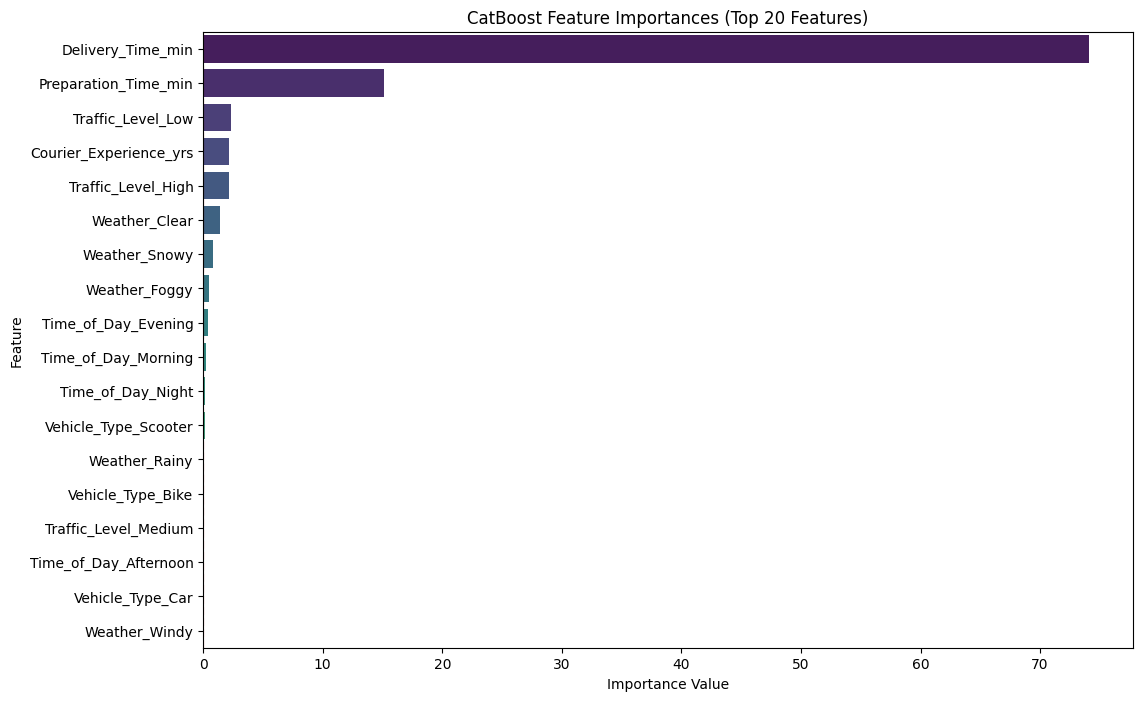

In [ ]:
# 1. GET FEATURE NAMES AFTER PREPROCESSING
# a. Numerical features (already scaled)
numeric_feature_names = numerical_features  # ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']

# b. Categorical features (from one-hot encoding)
categorical_encoder = preprocessor.named_transformers_['cat']['onehot']
categorical_feature_names = categorical_encoder.get_feature_names_out(categorical_multiclass)

# c. Combine all feature names
all_feature_names = np.concatenate([numeric_feature_names, categorical_feature_names])

# 2. GET FEATURE IMPORTANCE FROM CATBOOST
feature_importances = model_cb_tuned.get_feature_importance()

# 3. CREATE ANALYSIS DATAFRAME
coef_df = pd.DataFrame({
    'feature': all_feature_names,
    'importance': feature_importances,
    'abs_importance': np.abs(feature_importances)
}).sort_values('abs_importance', ascending=False)

# 4. DISPLAY TOP 10 MOST INFLUENTIAL FEATURES
print("🔝 Top 10 Most Influential Features:")
print(coef_df.head(10))

# 5. VISUALIZATION
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=coef_df.head(20), palette='viridis')
plt.title('CatBoost Feature Importances (Top 20 Features)')
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.axvline(0, color='red', linestyle='--')  # Zero line reference (opsional, tidak terlalu perlu di CatBoost)
plt.show()

In [ ]:
# Create SHAP explainer (optimized for tree models)
import shap
import numpy
explainer = shap.TreeExplainer(model_cb_tuned)
shap_explanation = explainer(X_test_processed)
shap_values = explainer.shap_values(X_test_processed)

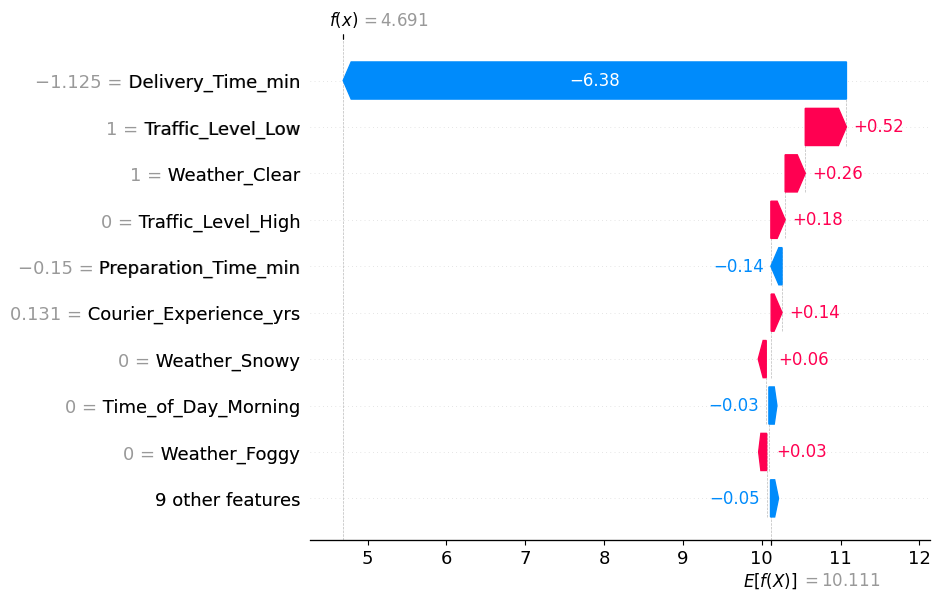

In [ ]:
# Tambahkan nama fitur
shap_explanation.feature_names = all_feature_names

# Waterfall plot untuk satu sample (misalnya sample ke-0)
sample_idx = 0
shap.plots.waterfall(shap_explanation[sample_idx])

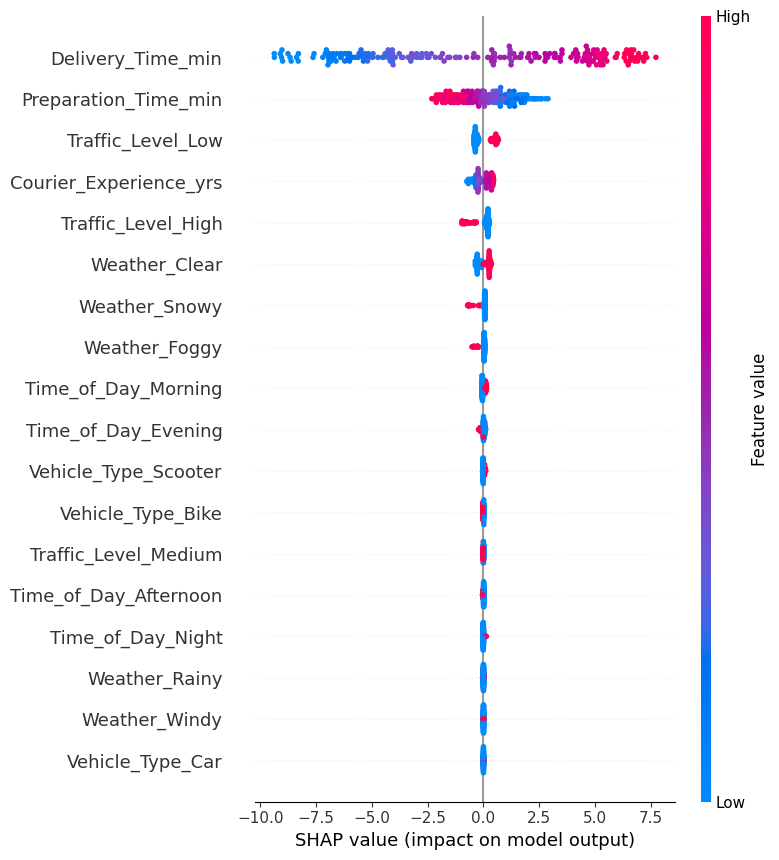

In [ ]:
# Detailed summary plot with feature value distributions
shap.summary_plot(shap_explanation, X_test_processed)

In [ ]:
import joblib
import os
from datetime import datetime

# 1. Buat direktori 'model' jika belum ada
os.makedirs('model_deploy', exist_ok=True)

# 2. Simpan Model Ridge Regression
joblib.dump(model_cb_tuned, 'model_deploy/catboost_model.joblib')

# 3. Simpan Preprocessor
joblib.dump(preprocessor, 'model_deploy/preprocessor.joblib')

# 4. Simpan Metadata Model (Opsional)
model_metadata = {
    'model_type': 'Catboost Regression',
    'training_date': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    'features': {
        'numerical': numerical_features,
        'categorical': categorical_multiclass
    },
    'best_params': model_ridge_tuned.get_params()
}

joblib.dump(model_metadata, 'model_deploy/model_metadata.joblib')

# 5. Verifikasi penyimpanan
print("✅ Model & Preprocessor Tersimpan di:")
print(f"- Model: model_deploy/catboost_model.joblib")
print(f"- Preprocessor: model_deploy/preprocessor.joblib")
print(f"- Metadata: model_deploy/model_metadata.joblib")

✅ Model & Preprocessor Tersimpan di:
- Model: model_deploy/catboost_model.joblib
- Preprocessor: model_deploy/preprocessor.joblib
- Metadata: model_deploy/model_metadata.joblib


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import shutil

# Buat folder di Google Drive kalau belum ada
drive_folder = "/content/drive/MyDrive/model_deploy"
os.makedirs(drive_folder, exist_ok=True)

# Copy semua file model ke Drive
shutil.copy("model_deploy/catboost_model.joblib", drive_folder)
shutil.copy("model_deploy/preprocessor.joblib", drive_folder)
shutil.copy("model_deploy/model_metadata.joblib", drive_folder)

print("✅ Semua file berhasil disalin ke Google Drive!")

✅ Semua file berhasil disalin ke Google Drive!


In [ ]:
# Where is your data_path
data_path = '/content/drive/MyDrive/Final project Take Home Test dibimbing/'
df_food.to_csv(data_path + 'Food_Delivery_Baru.csv', index = False)